In [1]:
import torch.nn.functional as F
from torchvision import transforms 
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
from torch import nn
import math
from torch.optim import Adam
import tqdm
import random
import warnings
warnings.filterwarnings('ignore')

from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length

In [2]:
model = SimpleUnet()

In [3]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 50

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = "diffusion_notebook/fox1/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)

<All keys matched successfully>

In [4]:
T = 50
betas = linear_beta_schedule(timesteps=T)

# Pre-calculate different terms for closed form
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

# attempt 1:
- T = 50
- epochs = 100

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for 

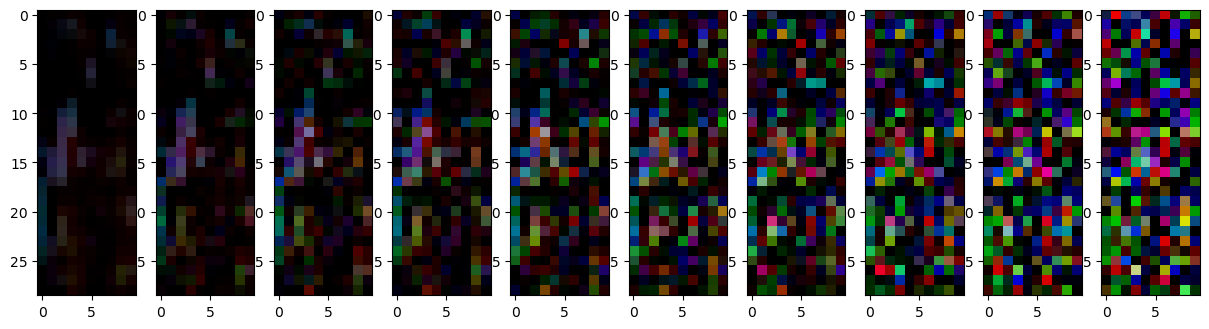

In [5]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 50
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/fox2/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

# attempt 2
- T = 500
- epochs = 1000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

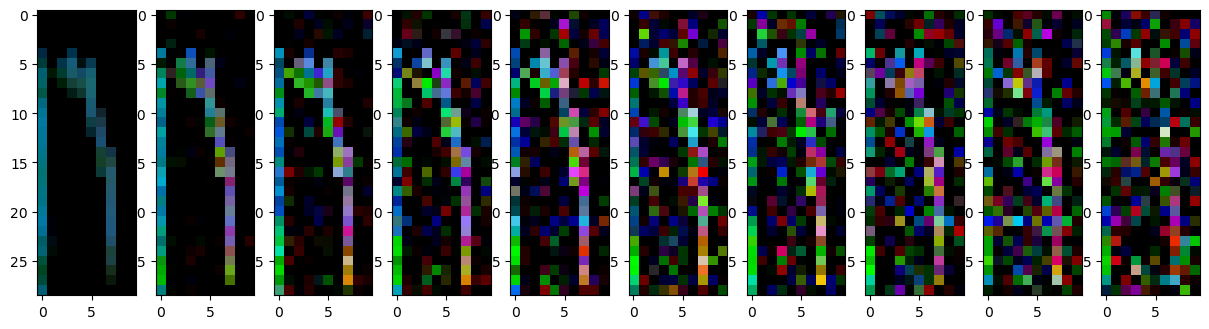

In [6]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 500
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/fox2/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

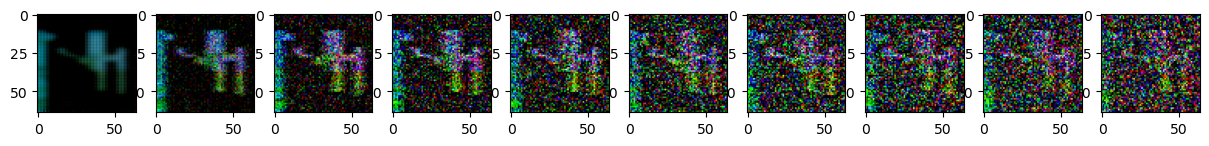

In [9]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 500
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/fox2/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image_no_resize(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

# attempt 3
- T = 100
- epoch = 1000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

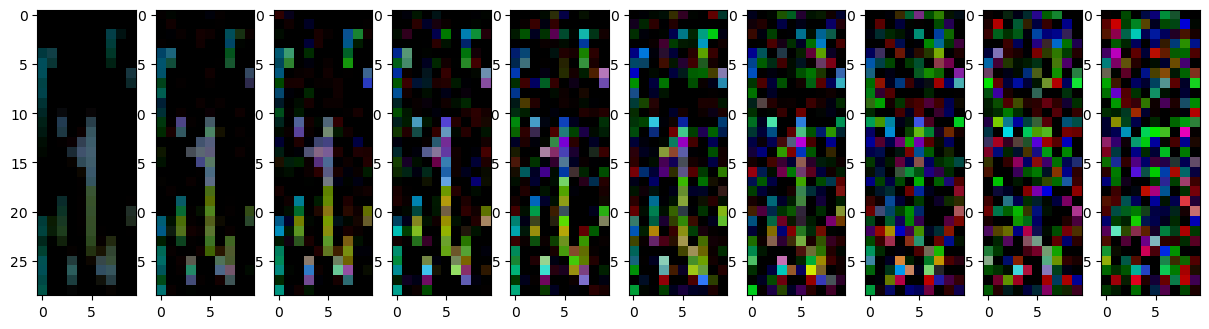

In [10]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 100
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/fox3/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

# attempt 4
- T = 1000
- epochs = 1000

### epoch 50:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

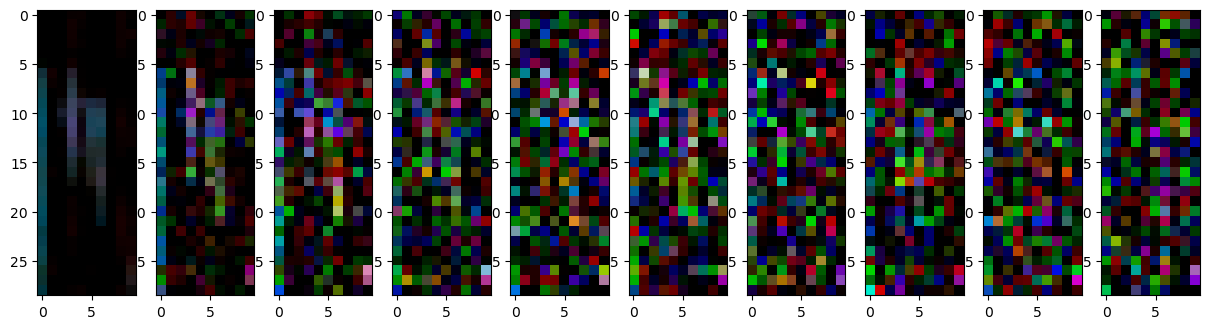

In [11]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch50/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epoch 100

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

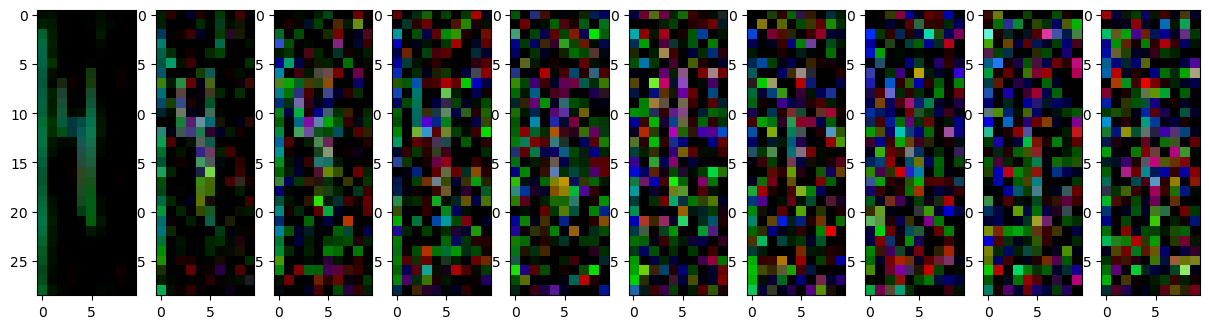

In [12]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch100/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epch 150

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

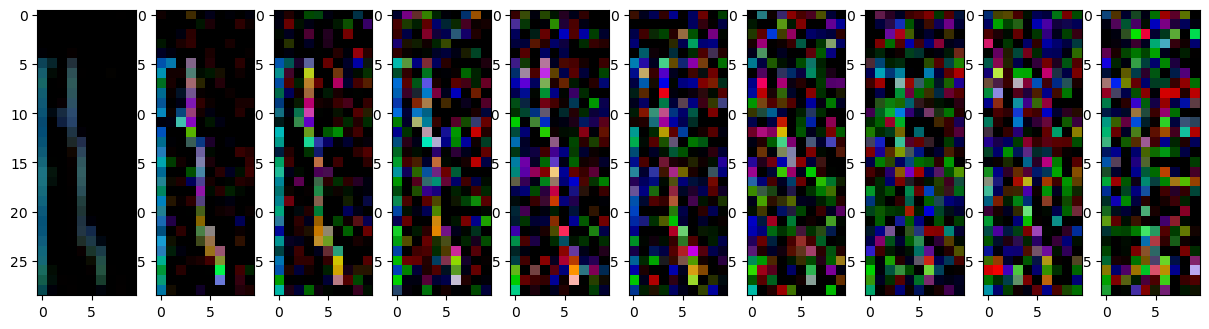

In [13]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch150/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

# epoch 200

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

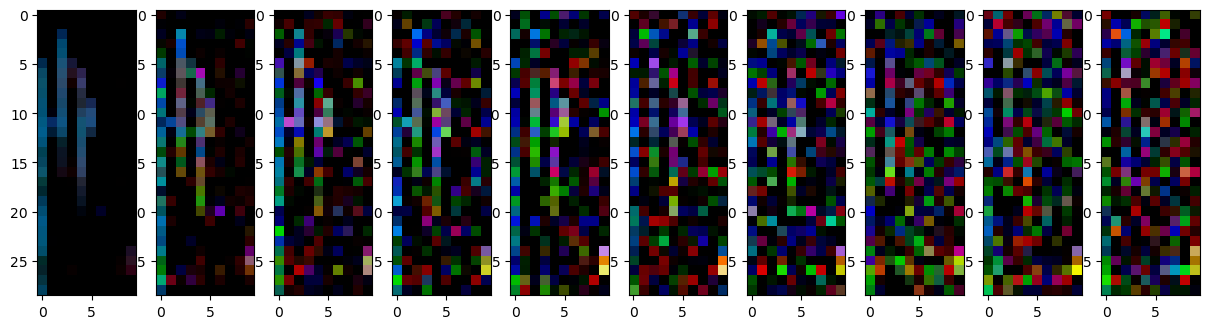

In [14]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch200/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epoch 250

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

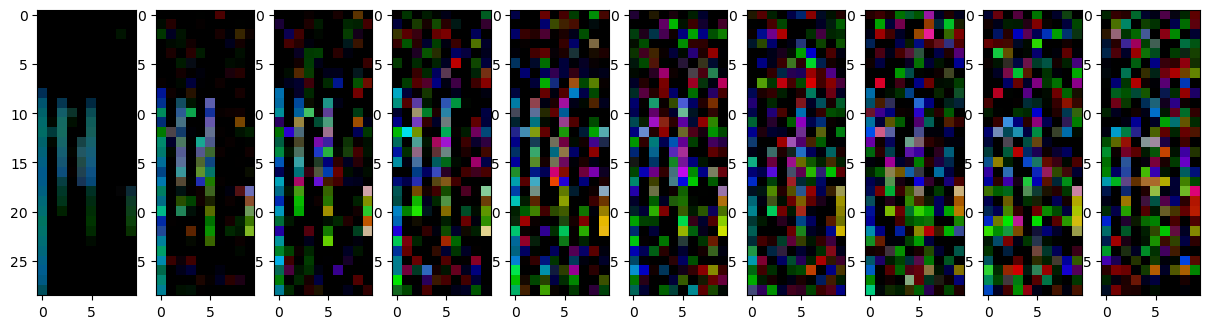

In [15]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
epoch_num = 250
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch" + str(epoch_num) + "/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epoch 300

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

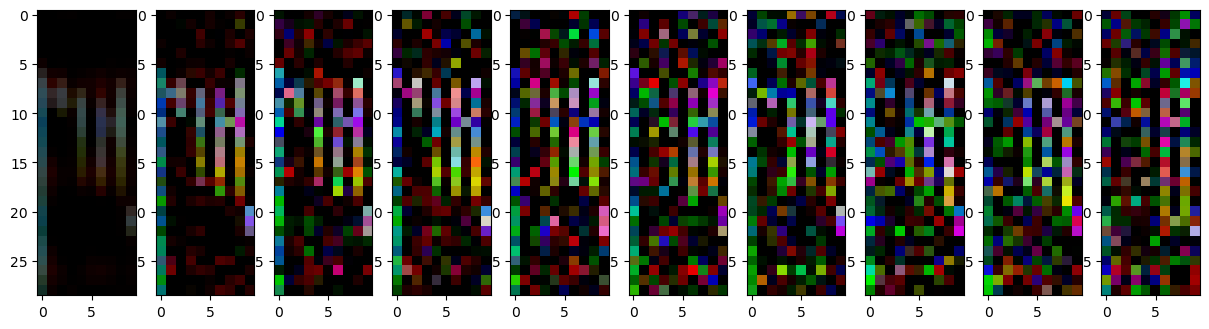

In [16]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
epoch_num = 300
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch" + str(epoch_num) + "/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epoch 350

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

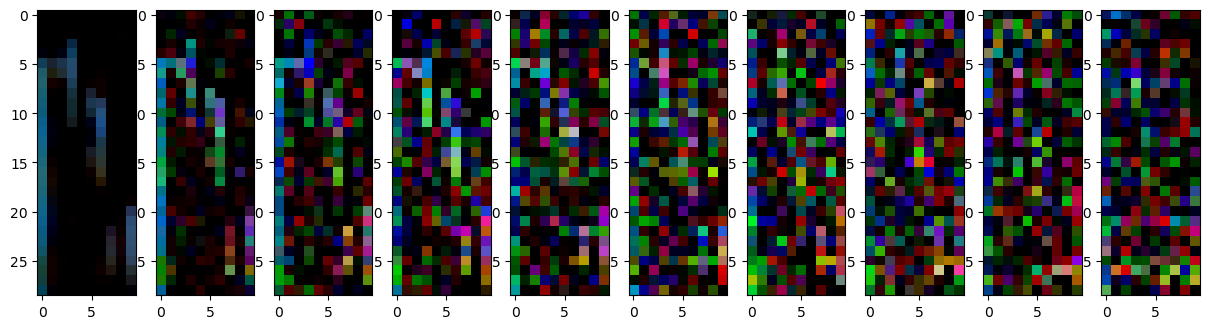

In [17]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
epoch_num = 350
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch" + str(epoch_num) + "/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epoch 450

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

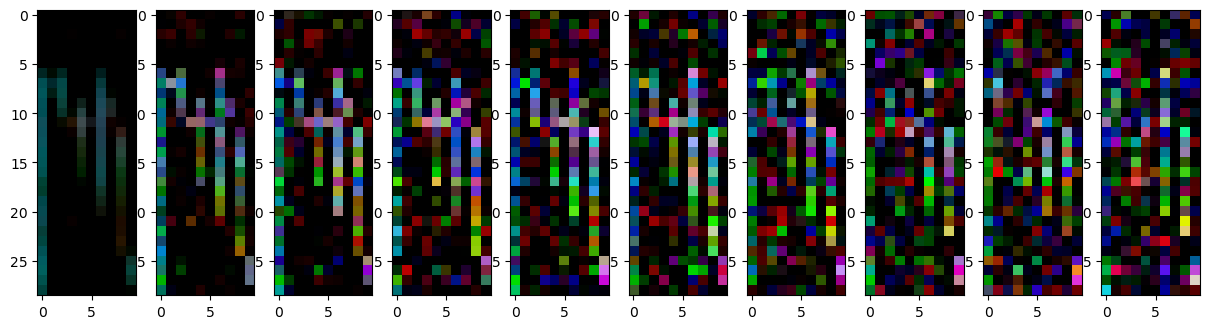

In [102]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
epoch_num = 450
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch" + str(epoch_num) + "/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epoch 650

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

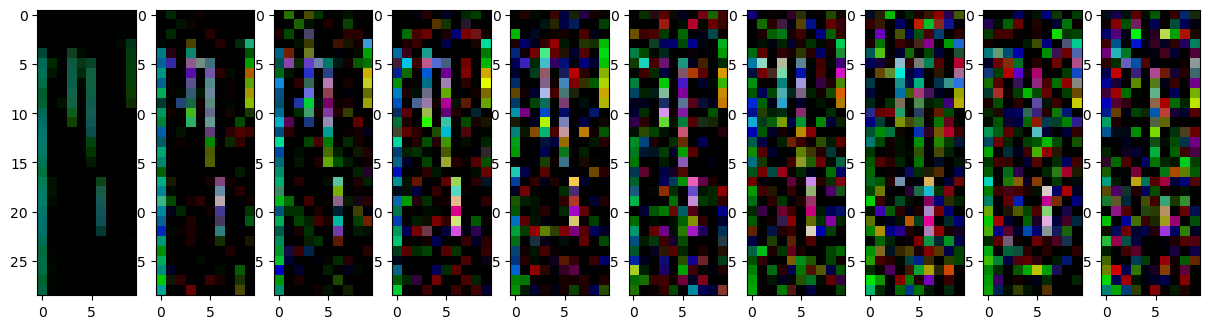

In [19]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
epoch_num = 650
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch" + str(epoch_num) + "/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epoch 700

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

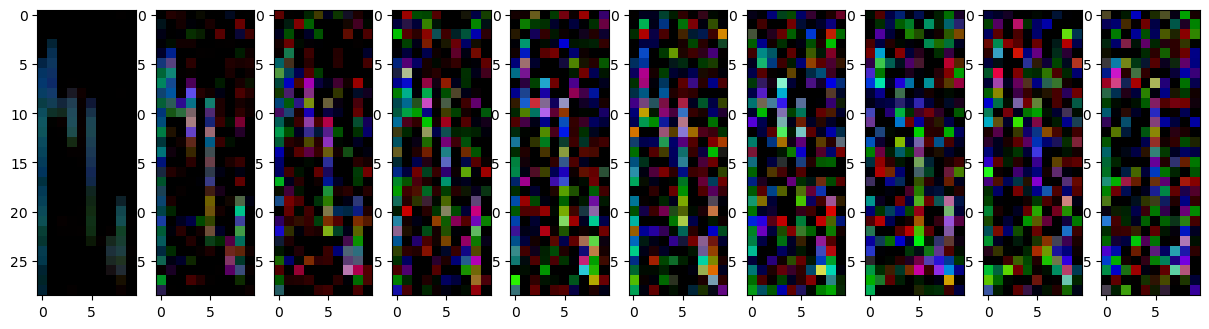

In [20]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
epoch_num = 700
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch" + str(epoch_num) + "/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epoch 750

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

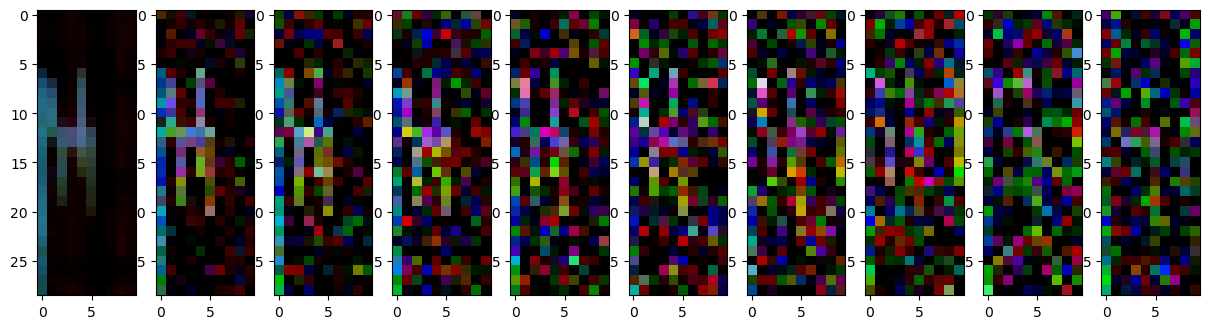

In [21]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
epoch_num = 750
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch" + str(epoch_num) + "/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

### epoch 1000

In [10]:
BATCH_SIZE = 128
IMG_SIZE = 64
T = 1000
epoch_num = 1000
betas = linear_beta_schedule(timesteps=T)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleUnet()
model_path = "diffusion_notebook/T&E1000/epoch1000/diffusion_test.pt"
saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)
sample_plot_image(model, T, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)

RuntimeError: Error(s) in loading state_dict for SimpleUnet:
	Missing key(s) in state_dict: "time_mlp.1.weight", "time_mlp.1.bias", "conv0.weight", "conv0.bias", "downs.0.time_mlp.weight", "downs.0.time_mlp.bias", "downs.0.conv1.weight", "downs.0.conv1.bias", "downs.0.transform.weight", "downs.0.transform.bias", "downs.0.conv2.weight", "downs.0.conv2.bias", "downs.0.bnorm1.weight", "downs.0.bnorm1.bias", "downs.0.bnorm1.running_mean", "downs.0.bnorm1.running_var", "downs.0.bnorm2.weight", "downs.0.bnorm2.bias", "downs.0.bnorm2.running_mean", "downs.0.bnorm2.running_var", "downs.1.time_mlp.weight", "downs.1.time_mlp.bias", "downs.1.conv1.weight", "downs.1.conv1.bias", "downs.1.transform.weight", "downs.1.transform.bias", "downs.1.conv2.weight", "downs.1.conv2.bias", "downs.1.bnorm1.weight", "downs.1.bnorm1.bias", "downs.1.bnorm1.running_mean", "downs.1.bnorm1.running_var", "downs.1.bnorm2.weight", "downs.1.bnorm2.bias", "downs.1.bnorm2.running_mean", "downs.1.bnorm2.running_var", "downs.2.time_mlp.weight", "downs.2.time_mlp.bias", "downs.2.conv1.weight", "downs.2.conv1.bias", "downs.2.transform.weight", "downs.2.transform.bias", "downs.2.conv2.weight", "downs.2.conv2.bias", "downs.2.bnorm1.weight", "downs.2.bnorm1.bias", "downs.2.bnorm1.running_mean", "downs.2.bnorm1.running_var", "downs.2.bnorm2.weight", "downs.2.bnorm2.bias", "downs.2.bnorm2.running_mean", "downs.2.bnorm2.running_var", "downs.3.time_mlp.weight", "downs.3.time_mlp.bias", "downs.3.conv1.weight", "downs.3.conv1.bias", "downs.3.transform.weight", "downs.3.transform.bias", "downs.3.conv2.weight", "downs.3.conv2.bias", "downs.3.bnorm1.weight", "downs.3.bnorm1.bias", "downs.3.bnorm1.running_mean", "downs.3.bnorm1.running_var", "downs.3.bnorm2.weight", "downs.3.bnorm2.bias", "downs.3.bnorm2.running_mean", "downs.3.bnorm2.running_var", "ups.0.time_mlp.weight", "ups.0.time_mlp.bias", "ups.0.conv1.weight", "ups.0.conv1.bias", "ups.0.transform.weight", "ups.0.transform.bias", "ups.0.conv2.weight", "ups.0.conv2.bias", "ups.0.bnorm1.weight", "ups.0.bnorm1.bias", "ups.0.bnorm1.running_mean", "ups.0.bnorm1.running_var", "ups.0.bnorm2.weight", "ups.0.bnorm2.bias", "ups.0.bnorm2.running_mean", "ups.0.bnorm2.running_var", "ups.1.time_mlp.weight", "ups.1.time_mlp.bias", "ups.1.conv1.weight", "ups.1.conv1.bias", "ups.1.transform.weight", "ups.1.transform.bias", "ups.1.conv2.weight", "ups.1.conv2.bias", "ups.1.bnorm1.weight", "ups.1.bnorm1.bias", "ups.1.bnorm1.running_mean", "ups.1.bnorm1.running_var", "ups.1.bnorm2.weight", "ups.1.bnorm2.bias", "ups.1.bnorm2.running_mean", "ups.1.bnorm2.running_var", "ups.2.time_mlp.weight", "ups.2.time_mlp.bias", "ups.2.conv1.weight", "ups.2.conv1.bias", "ups.2.transform.weight", "ups.2.transform.bias", "ups.2.conv2.weight", "ups.2.conv2.bias", "ups.2.bnorm1.weight", "ups.2.bnorm1.bias", "ups.2.bnorm1.running_mean", "ups.2.bnorm1.running_var", "ups.2.bnorm2.weight", "ups.2.bnorm2.bias", "ups.2.bnorm2.running_mean", "ups.2.bnorm2.running_var", "ups.3.time_mlp.weight", "ups.3.time_mlp.bias", "ups.3.conv1.weight", "ups.3.conv1.bias", "ups.3.transform.weight", "ups.3.transform.bias", "ups.3.conv2.weight", "ups.3.conv2.bias", "ups.3.bnorm1.weight", "ups.3.bnorm1.bias", "ups.3.bnorm1.running_mean", "ups.3.bnorm1.running_var", "ups.3.bnorm2.weight", "ups.3.bnorm2.bias", "ups.3.bnorm2.running_mean", "ups.3.bnorm2.running_var", "output.weight", "output.bias". 
	Unexpected key(s) in state_dict: "inc.double_conv.0.weight", "inc.double_conv.1.weight", "inc.double_conv.1.bias", "inc.double_conv.3.weight", "inc.double_conv.4.weight", "inc.double_conv.4.bias", "down1.maxpool_conv.1.double_conv.0.weight", "down1.maxpool_conv.1.double_conv.1.weight", "down1.maxpool_conv.1.double_conv.1.bias", "down1.maxpool_conv.1.double_conv.3.weight", "down1.maxpool_conv.1.double_conv.4.weight", "down1.maxpool_conv.1.double_conv.4.bias", "down1.maxpool_conv.2.double_conv.0.weight", "down1.maxpool_conv.2.double_conv.1.weight", "down1.maxpool_conv.2.double_conv.1.bias", "down1.maxpool_conv.2.double_conv.3.weight", "down1.maxpool_conv.2.double_conv.4.weight", "down1.maxpool_conv.2.double_conv.4.bias", "down1.emb_layer.1.weight", "down1.emb_layer.1.bias", "sa1.mha.in_proj_weight", "sa1.mha.in_proj_bias", "sa1.mha.out_proj.weight", "sa1.mha.out_proj.bias", "sa1.ln.weight", "sa1.ln.bias", "sa1.ff_self.0.weight", "sa1.ff_self.0.bias", "sa1.ff_self.1.weight", "sa1.ff_self.1.bias", "sa1.ff_self.3.weight", "sa1.ff_self.3.bias", "down2.maxpool_conv.1.double_conv.0.weight", "down2.maxpool_conv.1.double_conv.1.weight", "down2.maxpool_conv.1.double_conv.1.bias", "down2.maxpool_conv.1.double_conv.3.weight", "down2.maxpool_conv.1.double_conv.4.weight", "down2.maxpool_conv.1.double_conv.4.bias", "down2.maxpool_conv.2.double_conv.0.weight", "down2.maxpool_conv.2.double_conv.1.weight", "down2.maxpool_conv.2.double_conv.1.bias", "down2.maxpool_conv.2.double_conv.3.weight", "down2.maxpool_conv.2.double_conv.4.weight", "down2.maxpool_conv.2.double_conv.4.bias", "down2.emb_layer.1.weight", "down2.emb_layer.1.bias", "sa2.mha.in_proj_weight", "sa2.mha.in_proj_bias", "sa2.mha.out_proj.weight", "sa2.mha.out_proj.bias", "sa2.ln.weight", "sa2.ln.bias", "sa2.ff_self.0.weight", "sa2.ff_self.0.bias", "sa2.ff_self.1.weight", "sa2.ff_self.1.bias", "sa2.ff_self.3.weight", "sa2.ff_self.3.bias", "down3.maxpool_conv.1.double_conv.0.weight", "down3.maxpool_conv.1.double_conv.1.weight", "down3.maxpool_conv.1.double_conv.1.bias", "down3.maxpool_conv.1.double_conv.3.weight", "down3.maxpool_conv.1.double_conv.4.weight", "down3.maxpool_conv.1.double_conv.4.bias", "down3.maxpool_conv.2.double_conv.0.weight", "down3.maxpool_conv.2.double_conv.1.weight", "down3.maxpool_conv.2.double_conv.1.bias", "down3.maxpool_conv.2.double_conv.3.weight", "down3.maxpool_conv.2.double_conv.4.weight", "down3.maxpool_conv.2.double_conv.4.bias", "down3.emb_layer.1.weight", "down3.emb_layer.1.bias", "sa3.mha.in_proj_weight", "sa3.mha.in_proj_bias", "sa3.mha.out_proj.weight", "sa3.mha.out_proj.bias", "sa3.ln.weight", "sa3.ln.bias", "sa3.ff_self.0.weight", "sa3.ff_self.0.bias", "sa3.ff_self.1.weight", "sa3.ff_self.1.bias", "sa3.ff_self.3.weight", "sa3.ff_self.3.bias", "bot1.double_conv.0.weight", "bot1.double_conv.1.weight", "bot1.double_conv.1.bias", "bot1.double_conv.3.weight", "bot1.double_conv.4.weight", "bot1.double_conv.4.bias", "bot2.double_conv.0.weight", "bot2.double_conv.1.weight", "bot2.double_conv.1.bias", "bot2.double_conv.3.weight", "bot2.double_conv.4.weight", "bot2.double_conv.4.bias", "bot3.double_conv.0.weight", "bot3.double_conv.1.weight", "bot3.double_conv.1.bias", "bot3.double_conv.3.weight", "bot3.double_conv.4.weight", "bot3.double_conv.4.bias", "up1.conv.0.double_conv.0.weight", "up1.conv.0.double_conv.1.weight", "up1.conv.0.double_conv.1.bias", "up1.conv.0.double_conv.3.weight", "up1.conv.0.double_conv.4.weight", "up1.conv.0.double_conv.4.bias", "up1.conv.1.double_conv.0.weight", "up1.conv.1.double_conv.1.weight", "up1.conv.1.double_conv.1.bias", "up1.conv.1.double_conv.3.weight", "up1.conv.1.double_conv.4.weight", "up1.conv.1.double_conv.4.bias", "up1.emb_layer.1.weight", "up1.emb_layer.1.bias", "sa4.mha.in_proj_weight", "sa4.mha.in_proj_bias", "sa4.mha.out_proj.weight", "sa4.mha.out_proj.bias", "sa4.ln.weight", "sa4.ln.bias", "sa4.ff_self.0.weight", "sa4.ff_self.0.bias", "sa4.ff_self.1.weight", "sa4.ff_self.1.bias", "sa4.ff_self.3.weight", "sa4.ff_self.3.bias", "up2.conv.0.double_conv.0.weight", "up2.conv.0.double_conv.1.weight", "up2.conv.0.double_conv.1.bias", "up2.conv.0.double_conv.3.weight", "up2.conv.0.double_conv.4.weight", "up2.conv.0.double_conv.4.bias", "up2.conv.1.double_conv.0.weight", "up2.conv.1.double_conv.1.weight", "up2.conv.1.double_conv.1.bias", "up2.conv.1.double_conv.3.weight", "up2.conv.1.double_conv.4.weight", "up2.conv.1.double_conv.4.bias", "up2.emb_layer.1.weight", "up2.emb_layer.1.bias", "sa5.mha.in_proj_weight", "sa5.mha.in_proj_bias", "sa5.mha.out_proj.weight", "sa5.mha.out_proj.bias", "sa5.ln.weight", "sa5.ln.bias", "sa5.ff_self.0.weight", "sa5.ff_self.0.bias", "sa5.ff_self.1.weight", "sa5.ff_self.1.bias", "sa5.ff_self.3.weight", "sa5.ff_self.3.bias", "up3.conv.0.double_conv.0.weight", "up3.conv.0.double_conv.1.weight", "up3.conv.0.double_conv.1.bias", "up3.conv.0.double_conv.3.weight", "up3.conv.0.double_conv.4.weight", "up3.conv.0.double_conv.4.bias", "up3.conv.1.double_conv.0.weight", "up3.conv.1.double_conv.1.weight", "up3.conv.1.double_conv.1.bias", "up3.conv.1.double_conv.3.weight", "up3.conv.1.double_conv.4.weight", "up3.conv.1.double_conv.4.bias", "up3.emb_layer.1.weight", "up3.emb_layer.1.bias", "sa6.mha.in_proj_weight", "sa6.mha.in_proj_bias", "sa6.mha.out_proj.weight", "sa6.mha.out_proj.bias", "sa6.ln.weight", "sa6.ln.bias", "sa6.ff_self.0.weight", "sa6.ff_self.0.bias", "sa6.ff_self.1.weight", "sa6.ff_self.1.bias", "sa6.ff_self.3.weight", "sa6.ff_self.3.bias", "outc.weight", "outc.bias". 

In [12]:
saved_model

OrderedDict([('inc.double_conv.0.weight',
              tensor([[[[-0.0731, -0.1890, -0.0908],
                        [-0.0202, -0.0074, -0.0801],
                        [ 0.0537, -0.0406, -0.0854]],
              
                       [[-0.1563, -0.1242, -0.1032],
                        [ 0.0537,  0.0026, -0.1287],
                        [ 0.1148, -0.0912, -0.0200]],
              
                       [[-0.1686,  0.1469, -0.0871],
                        [-0.1034, -0.0005, -0.0824],
                        [ 0.1135,  0.1280, -0.0062]]],
              
              
                      [[[ 0.0493, -0.1015,  0.1568],
                        [ 0.0942,  0.0860,  0.1872],
                        [-0.0841, -0.0875, -0.1859]],
              
                       [[ 0.1487,  0.0752,  0.0130],
                        [ 0.1416,  0.0727, -0.1725],
                        [-0.1250, -0.1743,  0.0495]],
              
                       [[-0.0824,  0.0467, -0.1090],
              

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


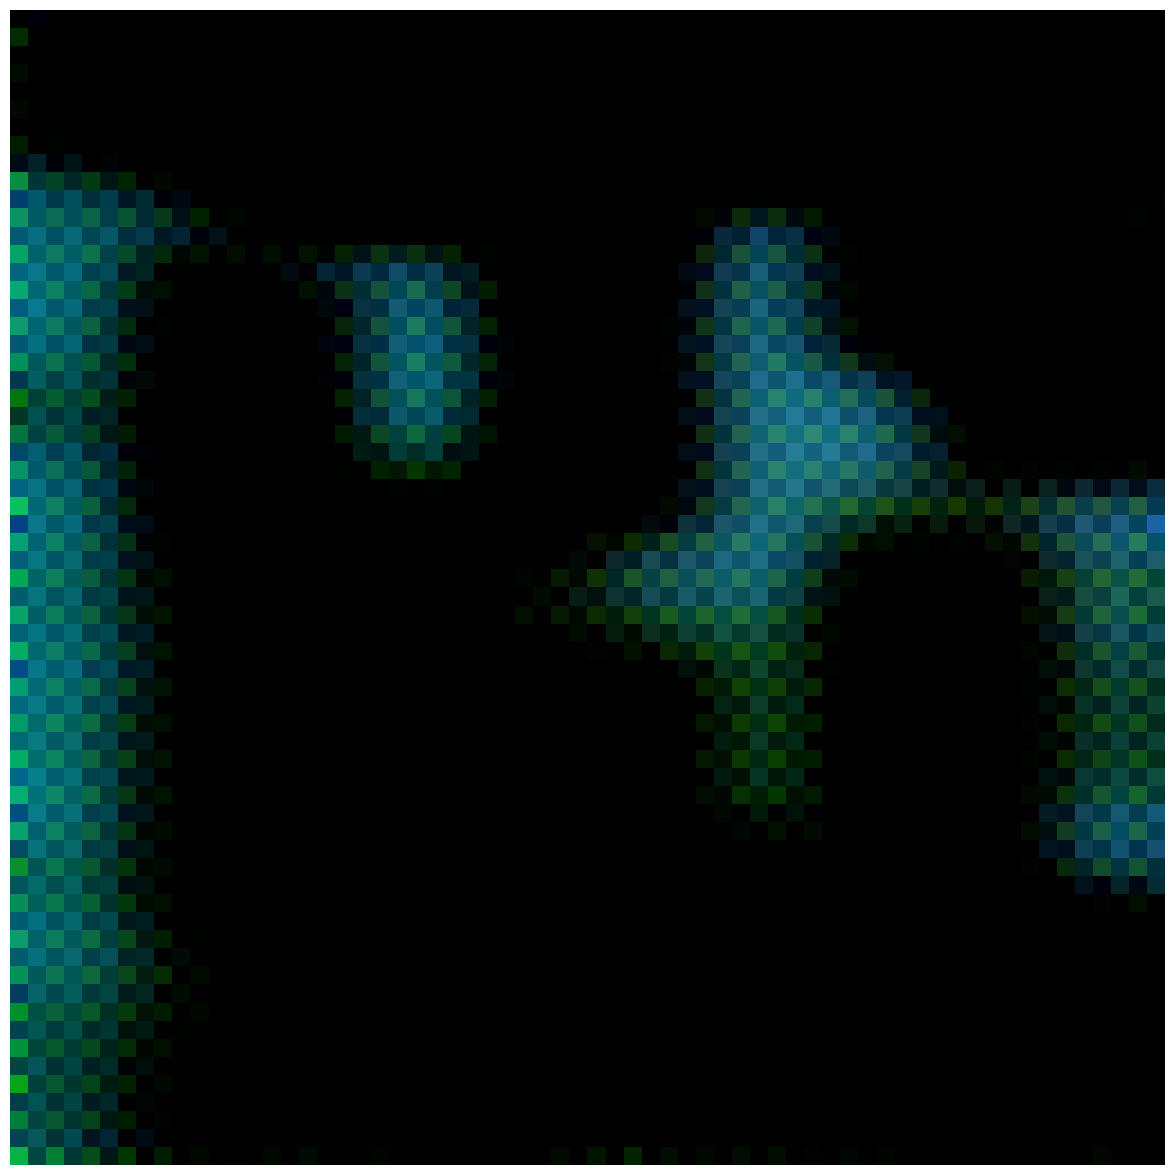

tensor([[[[-0.3067, -0.0255, -0.1250,  ..., -0.0528, -0.2198, -0.0244],
          [-0.0191, -0.1837, -0.0436,  ..., -0.1381, -0.0177, -0.1887],
          [-0.1428, -0.0480, -0.1353,  ..., -0.0646, -0.1442, -0.0574],
          ...,
          [ 0.0071, -0.1040,  0.0296,  ..., -0.1453, -0.0435, -0.1417],
          [-0.1169,  0.0241, -0.0694,  ..., -0.0593, -0.1460, -0.0424],
          [ 0.0259, -0.2355,  0.0171,  ..., -0.1333, -0.0175, -0.3087]],

         [[-0.3398, -0.0188, -0.1442,  ..., -0.0451, -0.2191, -0.0242],
          [ 0.1759, -0.1484, -0.0350,  ..., -0.1412, -0.0095, -0.0913],
          [-0.2385, -0.0511, -0.1894,  ..., -0.0949, -0.1772, -0.0305],
          ...,
          [ 0.4944,  0.2712,  0.3430,  ..., -0.1901, -0.0740, -0.1307],
          [ 0.2638,  0.3473,  0.1981,  ..., -0.1121, -0.2287, -0.0547],
          [ 0.6999,  0.2796,  0.4949,  ..., -0.1672, -0.0086, -0.0926]],

         [[-0.2185,  0.0350, -0.1240,  ..., -0.0433, -0.1352, -0.0282],
          [-0.2134, -0.1504, -

In [85]:
img_size = IMG_SIZE
img = torch.randn((1, 3, img_size, img_size), device=device)
plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 1
stepsize = int(T/num_images)

for i in range(0,T)[::-1]:
    t = torch.full((1,), i, device=device, dtype=torch.long)
    img = sample_timestep(model, img, t, betas, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas, posterior_variance)
    # Edit: This is to maintain the natural range of the distribution
    img = torch.clamp(img, -1.0, 1.0)
    if i % stepsize == 0:
        plt.subplot(1, num_images, int(i/stepsize)+1)
        show_tensor_image_no_resize(img.detach().cpu())
plt.show()
print(img)

In [87]:
reverse_transforms = transforms.Compose([
        transforms.Resize((29, 10))
    ])

relu = torch.nn.ReLU()

img = reverse_transforms(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


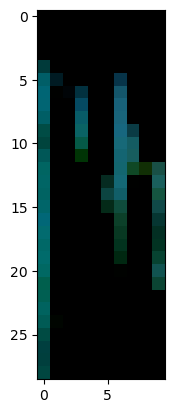

In [88]:
plt.imshow(img[0].detach().permute(1, 2, 0))

In [89]:
print(img.min(), img.max())

relu = torch.nn.ReLU()

def minmax_norm(img):
    new_data = img.clone()
    chan = img.shape[1]
    for i in range(chan):
        min_value = img[0, i].min()
        max_value = img[0, i].max()

        normalized_data = (img[0, i] - min_value) / (max_value - min_value)
        
        new_data[0, i] = normalized_data
        
    return new_data

image = minmax_norm(img)

tensor(-0.3457) tensor(0.5013)


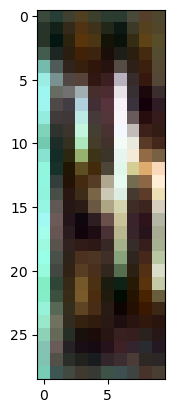

In [90]:
plt.imshow(image[0].detach().permute(1, 2, 0))

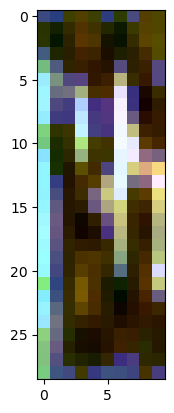

In [91]:
image = relu(image)
image[0, 2] = map_values(image[0, 2])
plt.imshow(image[0].detach().permute(1, 2, 0))

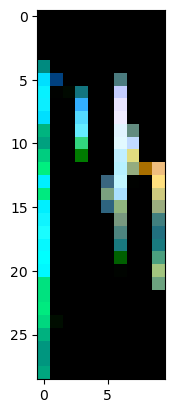

In [92]:
image = relu(img)
image = minmax_norm(image)
image[0, 2] = map_values(image[0, 2])
plt.imshow(image[0].detach().permute(1, 2, 0))


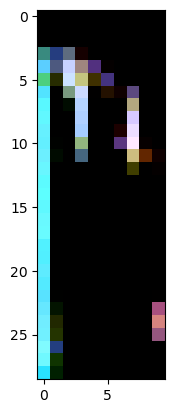



Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  100.00%
inconsistency due to gap between branches =  77.28%
inconsistency due to zgap in branch 98.66%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 38348, which is  100.00%
That corresponds to 100.00% of all images


Of all images, 100.00% have zero inconsistency
Of all images, 100.00% have distance main branch inconsistency
Of all images, 77.28% have gap between branches inconsistency
Of all images, 98.66% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 1292009
perc of occurences where mass is not preserved = 48.43% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where

In [11]:
test = torch.load("diffusion_notebook/T&E1000/diffusion_model_T&E1000_processed.pt")
plt.imshow(test[0].detach().permute(1, 2, 0))
plt.show()
consistent, inconsistent = check_consistency(test)
variable_consistancy_check(test, False)
avg_branch = check_branch_length(test)

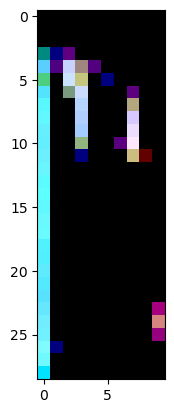



Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 60.94%
inconsistency due to distance not zero in main branch =  99.93%
inconsistency due to gap between branches =  82.63%
inconsistency due to zgap in branch 63.61%
inconsistency due to last descendant dont exist 0.04%

Number of images with two or more inconsistencies = 36911, which is  96.25%
That corresponds to 96.25% of all images


Of all images, 60.94% have zero inconsistency
Of all images, 99.93% have distance main branch inconsistency
Of all images, 82.63% have gap between branches inconsistency
Of all images, 63.61% have gap within branch inconsistency
Of all images, 0.04% have last descendant inconsistency
MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 781763
perc of occurences where mass is not preserved = 46.10% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass i

In [14]:
test2 = transform_diffusion_image(test)
plt.imshow(test2[0].detach().permute(1, 2, 0))
plt.show()
consistent, inconsistent = check_consistency(test2)
variable_consistancy_check(test2, False)
avg_branch = check_branch_length(test2)